**Кластеризация данных с использованием K-Means**

В данном примере используется алгоритм кластеризации K-Means для разделения данных на группы. Проведена загрузка данных, разделение, определение оптимального числа кластеров с помощью метода локтя и метода силуэта, обучение модели, визуализация кластеров и оценка качества кластеризации.

First 5 rows of the dataset:
[0.83685684 2.13635938]
[-1.4136581   7.40962324]
[1.15521298 5.09961887]
[-1.01861632  7.81491465]
[1.27135141 1.89254207]


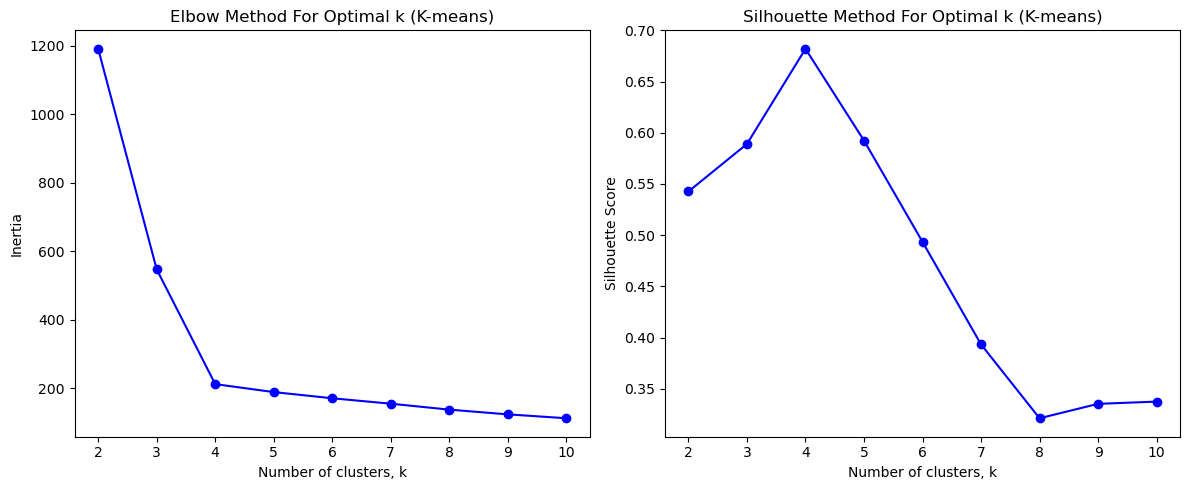

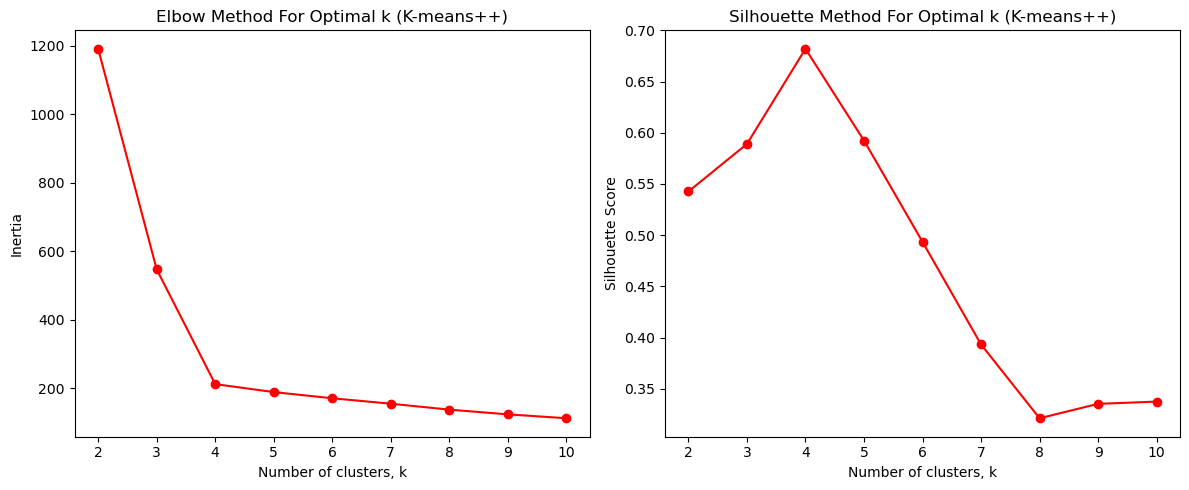

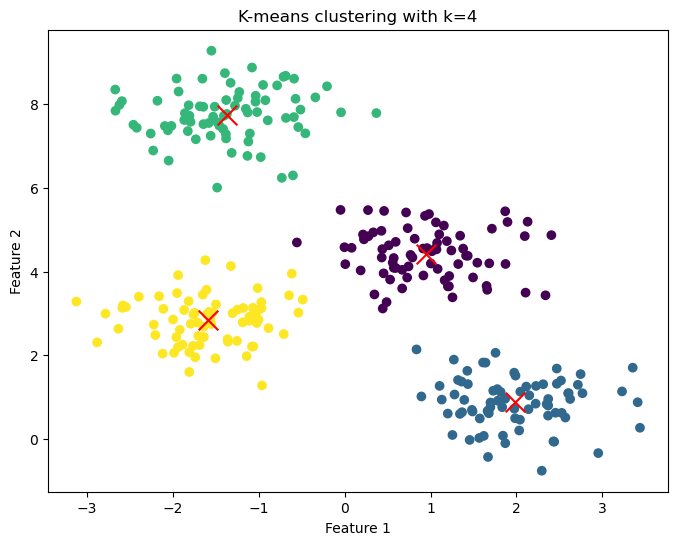

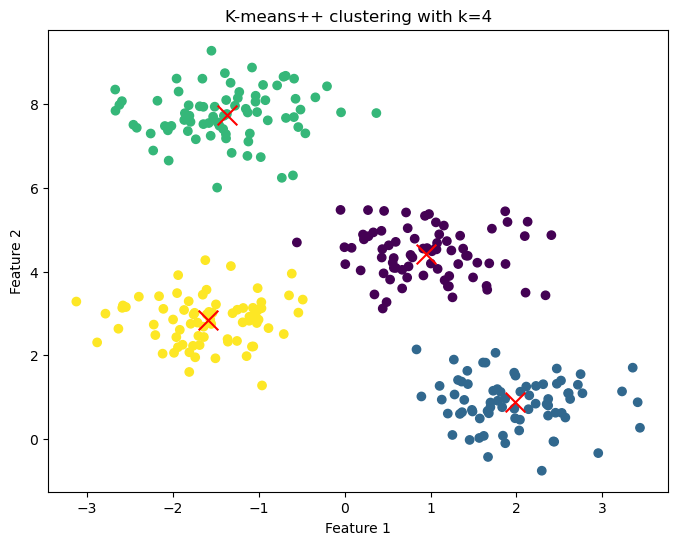

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Создание датасета с линейно разделимыми кластерами
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Вывод информации о датасете
print("First 5 rows of the dataset:")
for i in range(5):
    print(X[i])

# Определение оптимального количества кластеров с использованием правила локтя и метода силуэта для обычного k-means
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Визуализация правила локтя и метода силуэта для обычного k-means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (K-means)')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (K-means)')

plt.tight_layout()
plt.show()

# Определение оптимального количества кластеров с использованием правила локтя и метода силуэта для k-means++
inertia_plus = []
silhouette_scores_plus = []

for k in K:
    kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    kmeans_plus.fit(X)
    inertia_plus.append(kmeans_plus.inertia_)
    silhouette_scores_plus.append(silhouette_score(X, kmeans_plus.labels_))

# Визуализация правила локтя и метода силуэта для k-means++
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_plus, 'ro-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (K-means++)')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_plus, 'ro-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k (K-means++)')

plt.tight_layout()
plt.show()

# Визуализация разбиения на кластеры для обычного k-means с оптимальным k
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means clustering with k={optimal_k}')
plt.show()

# Визуализация разбиения на кластеры для k-means++ с оптимальным k
optimal_k_plus = 4

kmeans_plus = KMeans(n_clusters=optimal_k_plus, init='k-means++', random_state=0, n_init=10)
kmeans_plus.fit(X)
labels_plus = kmeans_plus.labels_
centroids_plus = kmeans_plus.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_plus, cmap='viridis')
plt.scatter(centroids_plus[:, 0], centroids_plus[:, 1], marker='x', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means++ clustering with k={optimal_k_plus}')
plt.show()
